In [1]:
import pandas as pd

In [3]:
tydenni = pd.read_csv("data/tydenni_statistiky.csv")
df = pd.read_csv("data/souhrnne_vysledky.csv")

In [9]:
tydenni['týden_od'] = pd.to_datetime(tydenni['týden_od'], dayfirst=True)
tydenni['víkend_od'] = pd.to_datetime(tydenni['víkend_od'], dayfirst=True)

In [81]:
tydenni['7d'] = tydenni['týden_diváci'] + tydenni['víkend_diváci']

In [95]:
df[df['mesic'].isin([7,8])].groupby('rok')['divactvo'].sum()

rok
2000    1385212.0
2001    1595085.0
2002    1606613.0
2003    1757140.0
2004    2115109.0
2005    1652615.0
2006    1953002.0
2007    2389232.0
2008    2646560.0
2009    2465771.0
2010    2736800.0
2011    2491277.0
2012    1939099.0
2013    1897602.0
2014    2103316.0
2015    1986348.0
2016    2525018.0
2017    2588999.0
2018    2678318.0
2019    3065776.0
2020    1660394.0
2021    2591589.0
2022    2748494.0
2023    3376088.0
2024    3399148.0
Name: divactvo, dtype: float64

In [83]:
letni_tydny = tydenni[tydenni['týden_od'].astype(str).str.contains('-07-',na=False) | (tydenni['víkend_od'].astype(str).str.contains('-08-',na=False))| (tydenni['víkend_od'].astype(str).str.contains('-07-',na=False))]

In [85]:
letni_tydny.groupby("rok")['týden'].nunique()

rok
2010    9
2011    8
2012    9
2013    9
2014    9
2015    9
2016    8
2017    9
2018    9
2019    9
2020    9
2021    9
2022    8
2023    9
2024    9
Name: týden, dtype: int64

In [99]:
letni_tydny.groupby("rok")['týden_diváci'].sum()

rok
2010    2247109.0
2011    1884123.0
2012    1726239.0
2013    1653356.0
2014    1864480.0
2015    1909909.0
2016    1919366.0
2017    2248848.0
2018    2176525.0
2019    2351870.0
2020    1144727.0
2021    2029123.0
2022    2130742.0
2023    2959668.0
2024    3039775.0
Name: týden_diváci, dtype: float64

<Axes: xlabel='rok'>

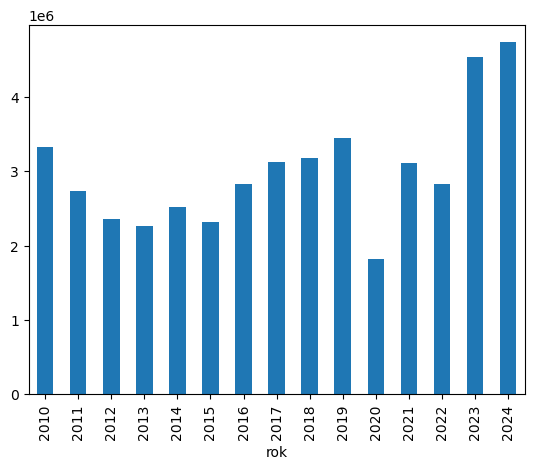

In [69]:
letni_tydny.groupby("rok")['7d'].sum().plot.bar()

In [71]:
letni_tydny[letni_tydny['rok'] == 2024].groupby('film')['7d'].sum().nlargest(10)

film
V hlavě 2                1243767.0
Deadpool & Wolverine      777829.0
Zápisník alkoholičky      773387.0
Já, padouch 4             598171.0
Vlny                      429968.0
Vetřelec: Romulus         184476.0
Fakjů princezny           101392.0
Námi to končí              89946.0
Zahradníkův rok            69845.0
Sladký život               41292.0
Name: 7d, dtype: float64

In [75]:
letni_tydny[letni_tydny['rok'] == 2023].groupby('film')['7d'].sum().nlargest(10)

film
Barbie                                      1036291.0
ONEMANSHOW - The Movie                       844751.0
Oppenheimer                                  762181.0
Mezi živly                                   249783.0
Nikdy neříkej nikdy                          227813.0
Indiana Jones a nástroj osudu                177972.0
Mission: Impossible Odplata - První část     161137.0
Mavka: Strážkyně lesa                        121016.0
Gran Turismo                                 113257.0
Dvě slova jako klíč                           91900.0
Name: 7d, dtype: float64

In [107]:
letni_tydny[letni_tydny['rok'] == 2011].groupby('film')['7d'].sum().nlargest(10)

film
Harry Potter a relikvie smrti - 2.část    1077408.0
Šmoulové                                   338903.0
Auta 2                                     316693.0
Transformers 3                             237992.0
Lidice                                     197732.0
Muži v naději                              113596.0
Zkažená úča                                 75421.0
Captain America: První Avenger              66858.0
Piráti z Karibiku: Na vlnách podivna        61835.0
Zrození Planety opic                        57864.0
Name: 7d, dtype: float64

<Axes: xlabel='rok'>

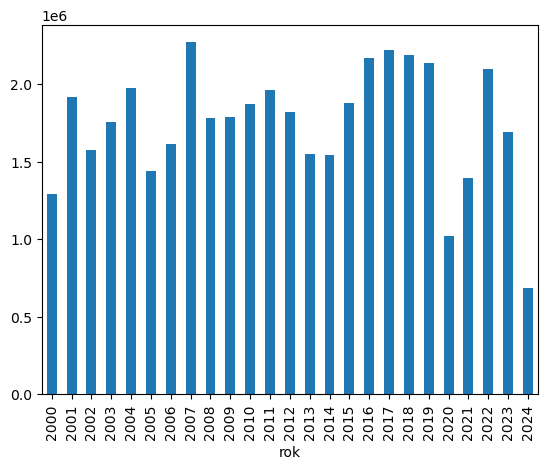

In [113]:
df[df['mesic'].isin([6,9])].groupby('rok')['divactvo'].sum().plot.bar()

<Axes: xlabel='rok'>

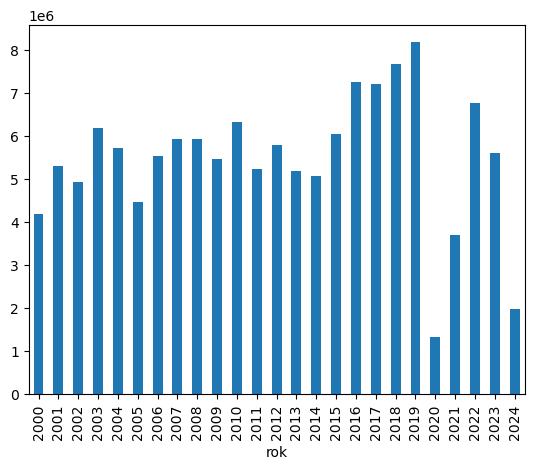

In [117]:
df[df['mesic'].isin([4,5,6,9,10,11])].groupby('rok')['divactvo'].sum().plot.bar()

<Axes: xlabel='rok'>

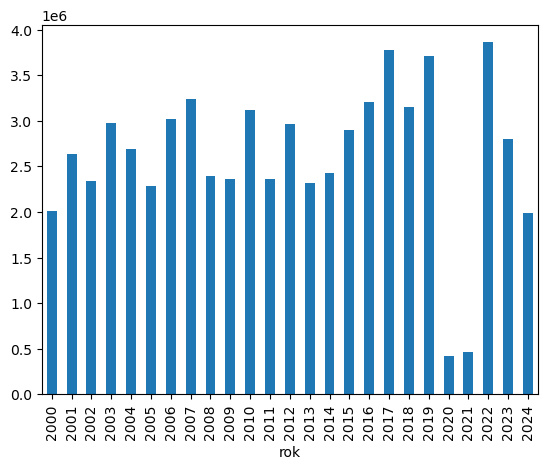

In [119]:
df[df['mesic'].isin([4,5,6])].groupby('rok')['divactvo'].sum().plot.bar()

<Axes: xlabel='rok'>

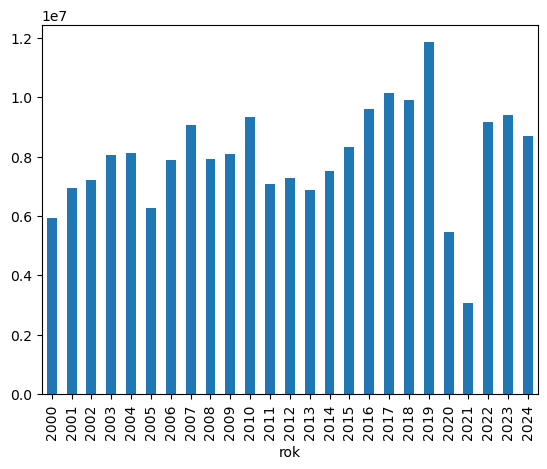

In [121]:
df[df['mesic'] < 9].groupby('rok')['divactvo'].sum().plot.bar()

<Axes: xlabel='rok'>

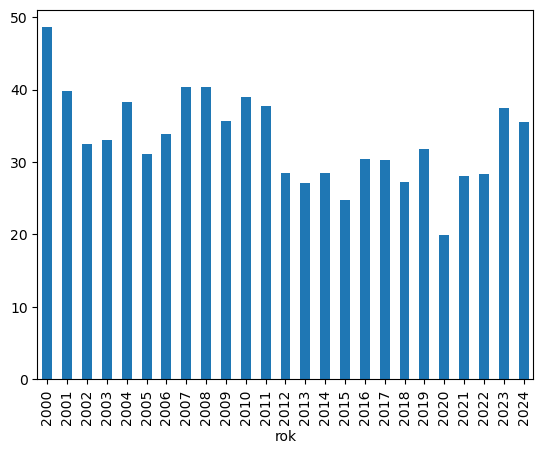

In [131]:
(df[df['mesic'].isin([7,8])].groupby('rok')['divactvo'].sum() / df[df['mesic'].isin([7,8])].groupby('rok')['predstaveni'].sum()).plot.bar()

<Axes: xlabel='mesic'>

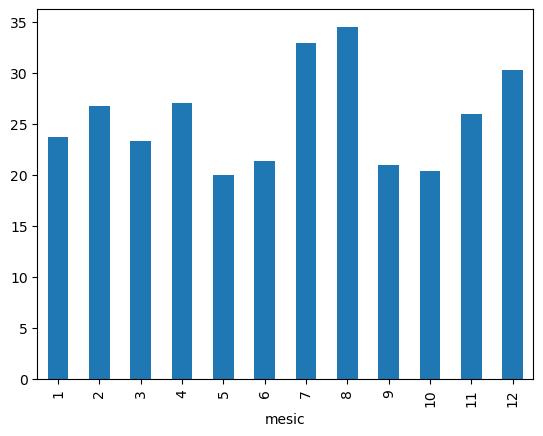

In [137]:
(df[df['rok'] >= 2022].groupby('mesic')['divactvo'].sum() / df[df['rok'] >= 2022].groupby('mesic')['predstaveni'].sum()).plot.bar()

<Axes: xlabel='rok'>

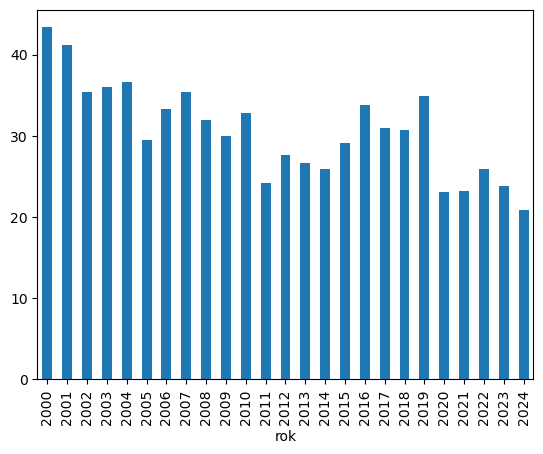

In [133]:
(df[~df['mesic'].isin([7,8])].groupby('rok')['divactvo'].sum() / df[~df['mesic'].isin([7,8])].groupby('rok')['predstaveni'].sum()).plot.bar()

<Axes: xlabel='rok'>

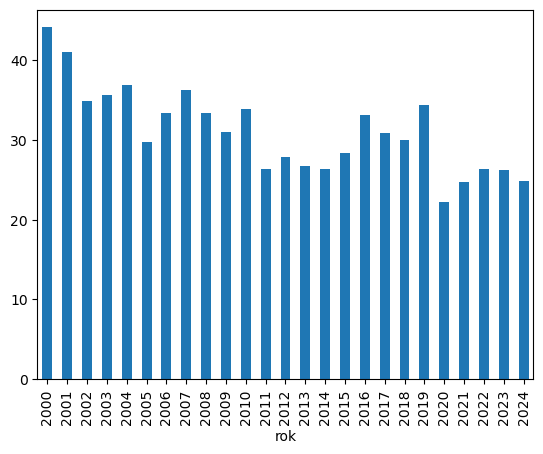

In [127]:
(df.groupby('rok')['divactvo'].sum() / df.groupby('rok')['predstaveni'].sum()).plot.bar()